In [107]:
# pip install wandb
! pip install lightgbm

   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   -------- ------------------------------- 0.3/1.3 MB 3.5 MB/s eta 0:00:01
   ---------------------------- ----------- 0.9/1.3 MB 7.3 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 8.4 MB/s eta 0:00:00


In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import wandb
from sklearn.ensemble import RandomForestClassifier

In [2]:
readIn = pd.read_csv("data/train_df.csv")
train_df = pd.DataFrame(readIn)

In [3]:
readIn = pd.read_csv("data/res_df.csv")
df = pd.DataFrame(readIn)

In [4]:
readIn = pd.read_csv("data/data_submission_example.csv")
df_target = pd.DataFrame(readIn)
# df_target.head(20)

# print(df_target.shape)
# print(df_target['BORROWER_ID'].unique)

In [5]:
df

,BORROWER_ID,target,CONTRACT_ID_SUM,CONTRACT_CREDIT_LOSS_SUM,CONTRACT_DEPT_SERVICE_TO_INCOME_MEAN,CONTRACT_INCOME_SUM,CONTRACT_INSTALMENT_AMOUNT_MEAN,CONTRACT_INTEREST_RATE_MEAN,CONTRACT_LGD_SUM,CONTRACT_LOAN_AMOUNT_SUM,...,CONTRACT_REFINANCED_10001.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT_0.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT_100001.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT_100002.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT_100003.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT_100004.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT_110001.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT_140001.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT_140002.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT_140003.0
0,d8SqtuEV,0,3,13831.0,27.76,256244.0,27149.0,17.31,3295461.0,3367556,...,0,2,0,1,0,0,0,0,0,0
1,lrdxML0g,0,1,0.0,0.00,0.0,9528.0,16.57,994868.0,55590,...,0,1,0,0,0,0,0,0,0,0
2,gII7nnq4,0,1,16350.0,7.05,127305.0,8899.0,22.35,282553.0,275924,...,0,0,0,0,1,0,0,0,0,0
3,MMkJ8z/e,0,1,0.0,0.00,0.0,14329.0,0.00,68981.0,138862,...,0,1,0,0,0,0,0,0,0,0
4,M417onFP,0,1,2395.0,0.00,0.0,4003.0,23.92,163319.0,169624,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149846,POeQToeq,0,1,0.0,0.00,0.0,0.0,0.00,0.0,211813,...,0,1,0,0,0,0,0,0,0,0
1149847,C0amt32x,0,1,0.0,0.00,0.0,0.0,0.00,0.0,485818,...,0,1,0,0,0,0,0,0,0,0
1149848,WW5vgE+y,0,1,0.0,0.00,0.0,0.0,0.00,0.0,5866242,...,0,1,0,0,0,0,0,0,0,0
1149849,26ZlUKOa,0,1,0.0,0.00,0.0,0.0,0.00,0.0,80914,...,0,1,0,0,0,0,0,0,0,0


In [6]:
from sklearn.linear_model import LogisticRegression

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Bemenő változók és célváltozó meghatározása
bemenő_változók = df.columns.drop(['BORROWER_ID', 'target'])  # Az összes oszlop, kivéve a 'BORROWER_ID' és 'target'

bemenő_változók=['CONTRACT_CREDIT_LOSS_SUM','CONTRACT_DEPT_SERVICE_TO_INCOME_MEAN','CONTRACT_INCOME_SUM','CONTRACT_INSTALMENT_AMOUNT_MEAN','CONTRACT_INTEREST_RATE_MEAN','CONTRACT_LGD_SUM','CONTRACT_LOAN_AMOUNT_SUM','CONTRACT_MORTGAGE_LENDING_VALUE_SUM','BORROWER_COUNTY_6.0','BORROWER_COUNTY_84.0','BORROWER_COUNTY_114.0','BORROWER_COUNTY_163.0','BORROWER_COUNTY_181.0','BORROWER_TYPE_OF_SETTLEMENT_3.0','CONTRACT_BANK_ID_1d42bbf5','CONTRACT_BANK_ID_2c6f5579','CONTRACT_BANK_ID_3b3b8a5e','CONTRACT_BANK_ID_41562c5f','CONTRACT_BANK_ID_c8072c06','CONTRACT_BANK_ID_caa130b5','CONTRACT_BANK_ID_dfce4aec','CONTRACT_CREDIT_INTERMEDIARY_1.0','CONTRACT_CREDIT_INTERMEDIARY_20001.0','CONTRACT_CURRENCY_14','CONTRACT_FREQUENCY_TYPE_3265c5b7','CONTRACT_FREQUENCY_TYPE_ad534644','CONTRACT_LOAN_CONTRACT_TYPE_1','CONTRACT_LOAN_CONTRACT_TYPE_2','CONTRACT_LOAN_CONTRACT_TYPE_11','CONTRACT_LOAN_TYPE_5a06241e','CONTRACT_LOAN_TYPE_83910425','CONTRACT_LOAN_TYPE_b503a0de','CONTRACT_LOAN_TYPE_d3aaffde','CONTRACT_LOAN_TYPE_eab72d7a','CONTRACT_REFINANCED_2.0','CONTRACT_REFINANCED_10001.0','CONTRACT_TYPE_OF_INTEREST_REPAYMENT_0.0','CONTRACT_TYPE_OF_INTEREST_REPAYMENT_100001.0','CONTRACT_TYPE_OF_INTEREST_REPAYMENT_100003.0','CONTRACT_TYPE_OF_INTEREST_REPAYMENT_140002.0','CONTRACT_TYPE_OF_INTEREST_REPAYMENT_140003.0' ]

X = train_df[bemenő_változók]  # Bemenő változók
y = train_df['target']  # Célváltozó



In [8]:
# param_grid = {
#     'n_estimators': [110, 120, 130],
#     'max_depth': [4, 5, 6 ],
#     'learning_rate': [0.06, 0.03, 0.05],
#     # További hiperparaméterek hozzáadhatók a param_grid-hez
# }

In [20]:
model = RandomForestClassifier(random_state=22, n_estimators= 150, max_depth=10, min_samples_split=5, min_samples_leaf=2, max_features='log2')

param_grid = {
    'n_estimators': [80, 100, 130],
    'max_depth': [5, 10, 20],
    # 'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2'],
}

# model.fit(X,y)

In [15]:
# # Modell inicializálása és illesztése az adatokra
# model = GradientBoostingClassifier(n_estimators=200, max_depth=10, random_state=22, learning_rate=0.01)

In [16]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=2, scoring='neg_log_loss')

In [17]:
grid_search.fit(X,y)

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
18 fits failed out of a total of 54.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", l

GridSearchCV(cv=2,
             estimator=RandomForestClassifier(max_depth=10, max_features='log2',
                                              min_samples_leaf=2,
                                              min_samples_split=5,
                                              n_estimators=150,
                                              random_state=22),
             param_grid={'max_depth': [5, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [80, 100, 130]},
             scoring='neg_log_loss')

In [18]:
print("Legjobb hiperparaméter-kombináció:", grid_search.best_params_)
print("Legjobb logloss:", grid_search.best_score_)

Legjobb hiperparaméter-kombináció: {'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 130}
Legjobb logloss: -0.017024264208399177


In [ ]:
# for i in range(0, len(X), batch_size):

#     print(f'Processing {i}', end='\r')
#     X_batch = X[i:i+batch_size]
#     y_batch = y[i:i+batch_size]

#     # Modell tanítása a batch-en
#     model.fit(X_batch, y_batch)

In [ ]:
# model = GradientBoostingClassifier(n_estimators=130, max_depth=5, random_state=22, learning_rate=0.03)

In [108]:
import lightgbm as lgb

In [25]:
model = RandomForestClassifier(random_state=22, n_estimators= 100, max_depth=10, min_samples_split=5, min_samples_leaf=2, max_features='log2')
# model = lgb.LGBMRegressor(random_state=22)

In [26]:
model.fit(X,y)

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=2,
                       min_samples_split=5, random_state=22)

# SAVING RESULTS

In [33]:
merged_df = df[df['BORROWER_ID'].isin(df_target['BORROWER_ID'])]

In [34]:
X = merged_df[bemenő_változók]

In [35]:
len(X)

1117674

In [36]:
import joblib

# joblib.dump(gbm, 'gradient_boosting_model.pkl')

In [37]:
# gbm = joblib.load('gradient_boosting_model.pkl')

In [38]:
merged_df['predicted_target'] = model.predict_proba(X)[:,1]

C:\Users\User\AppData\Local\Temp\ipykernel_14120\1279984231.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['predicted_target'] = model.predict_proba(X)[:,1]


In [153]:
# merged_df2=pd.merge(df_target,merged_df, on='BORROWER_ID', how='left')

In [154]:
# cols=['BORROWER_ID', 'predicted_target', 'PRED']

# res=merged_df2[cols]

In [155]:
merged_df

,BORROWER_ID,target,CONTRACT_ID_SUM,CONTRACT_CREDIT_LOSS_SUM,CONTRACT_DEPT_SERVICE_TO_INCOME_MEAN,CONTRACT_INCOME_SUM,CONTRACT_INSTALMENT_AMOUNT_MEAN,CONTRACT_INTEREST_RATE_MEAN,CONTRACT_LGD_SUM,CONTRACT_LOAN_AMOUNT_SUM,...,CONTRACT_TYPE_OF_INTEREST_REPAYMENT_0.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT_100001.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT_100002.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT_100003.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT_100004.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT_110001.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT_140001.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT_140002.0,CONTRACT_TYPE_OF_INTEREST_REPAYMENT_140003.0,predicted_target
0,d8SqtuEV,0,3,13831.0,27.76,256244.0,27149.0,17.31,3295461.0,3367556,...,2,0,1,0,0,0,0,0,0,0.000296
1,lrdxML0g,0,1,0.0,0.00,0.0,9528.0,16.57,994868.0,55590,...,1,0,0,0,0,0,0,0,0,0.000120
2,gII7nnq4,0,1,16350.0,7.05,127305.0,8899.0,22.35,282553.0,275924,...,0,0,0,1,0,0,0,0,0,0.000420
3,MMkJ8z/e,0,1,0.0,0.00,0.0,14329.0,0.00,68981.0,138862,...,1,0,0,0,0,0,0,0,0,0.000012
4,M417onFP,0,1,2395.0,0.00,0.0,4003.0,23.92,163319.0,169624,...,0,0,1,0,0,0,0,0,0,0.000380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149846,POeQToeq,0,1,0.0,0.00,0.0,0.0,0.00,0.0,211813,...,1,0,0,0,0,0,0,0,0,0.000713
1149847,C0amt32x,0,1,0.0,0.00,0.0,0.0,0.00,0.0,485818,...,1,0,0,0,0,0,0,0,0,0.000714
1149848,WW5vgE+y,0,1,0.0,0.00,0.0,0.0,0.00,0.0,5866242,...,1,0,0,0,0,0,0,0,0,0.002648
1149849,26ZlUKOa,0,1,0.0,0.00,0.0,0.0,0.00,0.0,80914,...,1,0,0,0,0,0,0,0,0,0.000495


In [39]:
cols=['BORROWER_ID', 'predicted_target']

res=merged_df[cols]

In [40]:
res['predicted_target'].isna().sum()

0

In [41]:
res.head(10)


,BORROWER_ID,predicted_target
0,d8SqtuEV,0.000999
1,lrdxML0g,0.000697
2,gII7nnq4,0.001015
3,MMkJ8z/e,0.000268
4,M417onFP,0.001122
5,u9GRAuen,0.000288
6,XPWFcJZI,0.000807
7,L2Nu2zZe,0.000846
8,5A0GWOi2,0.001289
9,lqPGd2+x,0.001096


In [42]:
res.columns=['BORROWER_ID', 'PRED']

<Axes: >

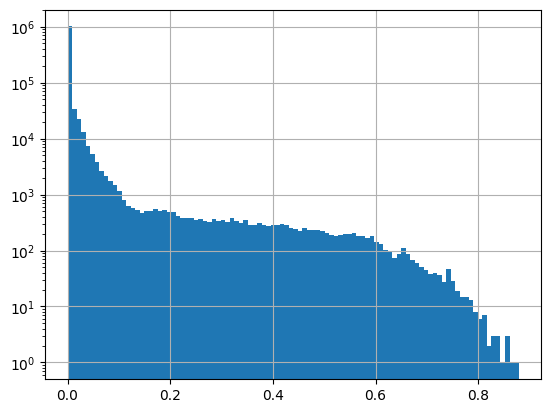

In [43]:
res['PRED'].hist(bins=100, log=True)

<Axes: >

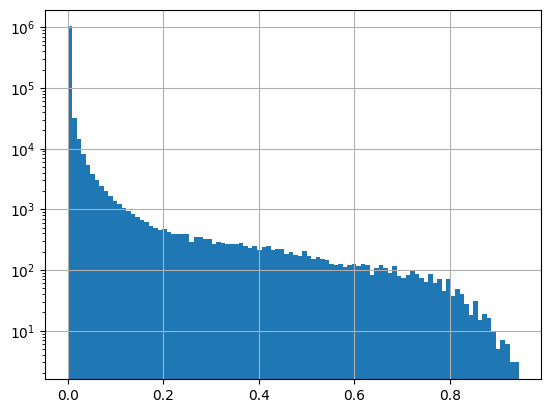

In [17]:
res['PRED'].hist(bins=100, log=True)

In [44]:
res['PRED'].mean()

0.009501926990743505

In [45]:
print(res.shape)
res.to_csv('data/results.csv', index=False)

(1117674, 2)


In [46]:
df1 = pd.read_csv('data/szentek csarnoka/results_top2.csv')


In [47]:
merge=pd.merge(df1, res, on='BORROWER_ID', how='inner')

In [51]:
hasonlosag_szazalek = (merge['PRED_x'] == merge['PRED_y']).mean() * 100

In [53]:
count=0
for item 
if (merge['PRED_x'] == merge['PRED_y']):
    count+=1
print(count)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [52]:
hasonlosag_szazalek

1.4783380484828312

In [36]:
multi = 0.0148/res['PRED'].mean()
res['PRED']=res['PRED']*multi

C:\Users\User\AppData\Local\Temp\ipykernel_11356\2399676423.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res['PRED']=res['PRED']*multi


In [37]:
print(res.shape)
res.to_csv('data/results.csv', index=False)

(1117674, 2)


In [ ]:
i1=importance

In [ ]:
importance = gbm.feature_importances_

with open('fontossagok.txt', 'w') as file:
    for i, val in enumerate(importance):
        print(f"A(z) {bemenő_változók[i]} oszlop fontossága: {val}")
        file.write(f"A(z) {bemenő_változók[i]} oszlop fontossága: {val}\n")

with open('fontossagok-tomb.txt', 'w') as file:
    for i, val in enumerate(importance):
        if (val>0):
            file.write(f"'{bemenő_változók[i]}',")

In [ ]:
# print(res.shape)
# res.to_csv('data/results2.csv', index=False)

In [ ]:
len(bemenő_változók)

In [ ]:
imp=[]
imp2=[]
for i in range(len(i1)):
    if(i1[i]>0):
        imp.append(i1[i])

for i in range(len(importance)):
    imp2.append(importance[i])

In [ ]:
imp

In [ ]:
imp2

In [ ]:
for i in range(len(importance)):
    print(imp[i]-importance[i])

In [ ]:
import operator

column_importance = {
    'CONTRACT_CREDIT_LOSS_SUM': 0.16910412766343422,
    'CONTRACT_DEPT_SERVICE_TO_INCOME_MEAN': 0.0010854199994039476,
    'CONTRACT_INCOME_SUM': 0.00016402107884890086,
    'CONTRACT_INSTALMENT_AMOUNT_MEAN': 0.031180862589240545,
    'CONTRACT_INTEREST_RATE_MEAN': 0.030192901911618403,
    'CONTRACT_LGD_SUM': 0.0325214105387914,
    'CONTRACT_LOAN_AMOUNT_SUM': 0.059547996438097175,
    'CONTRACT_MORTGAGE_LENDING_VALUE_SUM': 0.0,
    'BORROWER_COUNTY_6.0': 0.0005365996241172926,
    'BORROWER_COUNTY_84.0': 6.109712470258696e-05,
    'BORROWER_COUNTY_114.0': 9.897689643537617e-05,
    'BORROWER_COUNTY_163.0': 0.00019303156699422723,
    'BORROWER_COUNTY_181.0': 0.00016810538899377636,
    'BORROWER_TYPE_OF_SETTLEMENT_3.0': 0.0004964242038491479,
    'CONTRACT_BANK_ID_1d42bbf5': 0.02072295988285964,
    'CONTRACT_BANK_ID_2c6f5579': 0.015205379415055013,
    'CONTRACT_BANK_ID_3b3b8a5e': 0.0025394648772917995,
    'CONTRACT_BANK_ID_41562c5f': 0.000331062561971647,
    'CONTRACT_BANK_ID_c8072c06': 0.01539687105066358,
    'CONTRACT_BANK_ID_caa130b5': 0.01534073692598546,
    'CONTRACT_BANK_ID_dfce4aec': 0.001707396711430799,
    'CONTRACT_CREDIT_INTERMEDIARY_1.0': 0.0006397696888633114,
    'CONTRACT_CREDIT_INTERMEDIARY_20001.0': 0.07940693730027754,
    'CONTRACT_CURRENCY_14': 0.0004959617374286843,
    'CONTRACT_FREQUENCY_TYPE_3265c5b7': 0.032039941764354374,
    'CONTRACT_FREQUENCY_TYPE_ad534644': 0.0019382207639447467,
    'CONTRACT_LOAN_CONTRACT_TYPE_1': 0.005183842232022988,
    'CONTRACT_LOAN_CONTRACT_TYPE_2': 0.002683927949735623,
    'CONTRACT_LOAN_CONTRACT_TYPE_11': 0.0013724299685780837,
    'CONTRACT_LOAN_TYPE_5a06241e': 0.2193531725654373,
    'CONTRACT_LOAN_TYPE_83910425': 0.07409743147205664,
    'CONTRACT_LOAN_TYPE_b503a0de': 0.0011494721200213294,
    'CONTRACT_LOAN_TYPE_d3aaffde': 0.03253124500133724,
    'CONTRACT_LOAN_TYPE_eab72d7a': 0.007576329008210865,
    'CONTRACT_REFINANCED_2.0': 0.0016514849246236352,
    'CONTRACT_REFINANCED_10001.0': 0.0360400486606488,
    'CONTRACT_TYPE_OF_INTEREST_REPAYMENT_0.0': 0.021648224094653966,
    'CONTRACT_TYPE_OF_INTEREST_REPAYMENT_100001.0': 0.0007009618289603967,
    'CONTRACT_TYPE_OF_INTEREST_REPAYMENT_100003.0': 0.025900482687704014,
    'CONTRACT_TYPE_OF_INTEREST_REPAYMENT_140002.0': 0.052892616142717494,
    'CONTRACT_TYPE_OF_INTEREST_REPAYMENT_140003.0': 0.006102653638637873
}

# Rendezés a fontossági értékek alapján csökkenő sorrendben
sorted_columns = sorted(column_importance.items(), key=operator.itemgetter(1), reverse=True)

# Kiíratás vagy további felhasználás
for column, importance in sorted_columns:
    print(f'{column}: {importance}')